# Helsinki Population Point in Polygon

### Source
https://automating-gis-processes.github.io/2016/Lesson3-spatial-join.html

In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [2]:
addresses = pd.read_csv('data/addresses.txt', sep=';')
addresses.head(2)

,id,address
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"


In [ ]:
from geopandas.tools import geocode

with open('secrets/gmap-api-key.txt', 'r') as f:
    api_key = f.read().strip()

geo = geocode(addresses['address'], api_key=api_key)
geo.head(2)

In [65]:
join = geo.merge(addresses, on='address')
join.to_file('data/addresses.shp')

,geometry,address,id
0,POINT (24.9301702 60.1683731),"Kampinkuja 1, 00100 Helsinki, Finland",1001
1,POINT (25.080468 60.2097919),"Itäväylä, 00900 Helsinki, Finland",1004


In [67]:
addresses = gp.read_file('data/addresses.shp')
addresses.crs

{'init': 'epsg:4326'}

In [68]:
addr_proj = addresses.copy()
addr_proj['geometry'] = addr_proj['geometry'].to_crs(epsg=3879)
addr_proj['geometry'].head(2)

0     POINT (25496123.31407359 6672833.94156171)
1    POINT (25504461.65490529 6677449.307336226)
Name: geometry, dtype: object

In [69]:
from fiona.crs import from_epsg

addr_proj.crs = from_epsg(3879)
addr_proj.crs

{'init': 'epsg:3879', 'no_defs': True}

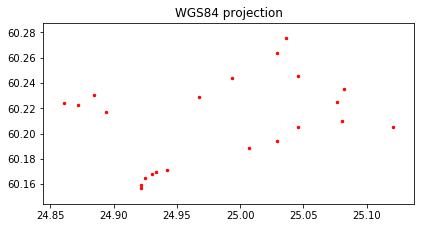

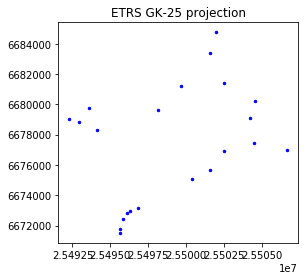

In [70]:
addresses.plot(markersize=6, color="red");
plt.title("WGS84 projection");
plt.tight_layout()

addr_proj.plot(markersize=6, color="blue");
plt.title("ETRS GK-25 projection");
plt.tight_layout()

addr_proj.to_file('data/addresses_epsg3879.shp')

In [71]:

pop = gp.read_file('data/Pop15/Vaestotietoruudukko_2015.shp')
pop.head(2)

,INDEX,ASUKKAITA,ASVALJYYS,IKA0_9,IKA10_19,IKA20_29,IKA30_39,IKA40_49,IKA50_59,IKA60_69,IKA70_79,IKA_YLI80,geometry
0,688,8,31.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6689749.005069185,..."
1,703,6,42.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6685998.998064222,..."


In [72]:
pop = pop.rename(columns={'ASUKKAITA': 'pop15'})
selected_cols = ['pop15', 'geometry']
pop = pop[selected_cols]

pop.tail(2)

,pop15,geometry
5782,9,"POLYGON ((25513499.99632164 6685498.999797418,..."
5783,30244,"POLYGON ((25513999.999929 6659998.998172711, 2..."


In [83]:
addrs = gp.read_file('data/addresses_epsg3879.shp')
addrs.head(2)

,address,id,geometry
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (25496123.31407359 6672833.94156171)
1,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25504461.65490529 6677449.307336226)


In [85]:
addrs.crs == pop.crs

True

In [86]:
join = gp.sjoin(addrs, pop, how="inner", op="within")
join.to_file('data/addresses_pop15_epsg3979.shp')
join

,address,id,geometry,index_right,pop15
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (25496123.31407359 6672833.94156171),3326,173
1,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25504461.65490529 6677449.307336226),4933,459
2,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (25495639.56049686 6671520.343245601),3259,1397
3,"Kontulantie 18, 00940 Helsinki, Finland",1006,POINT (25504526.0827151 6680245.787481702),4981,394
5,"Tapulikaupungintie 3, 00750 Helsinki, Finland",1008,POINT (25501984.05772807 6684755.73132898),4291,1027
6,"Sompionpolku 2, 00730 Helsinki, Finland",1009,POINT (25501611.29323668 6683417.520333283),4239,250
8,"Rautatientori 1, 00100 Helsinki, Finland",1011,POINT (25496808.64582102 6673146.836896984),3449,31
9,"Kuparitie 8, 00440 Helsinki, Finland",1012,POINT (25493579.52155477 6679773.85501982),2949,562
10,"Kylätie 23, 00320 Helsinki, Finland",1016,POINT (25494138.53128187 6678278.679355158),3036,414
11,"Åggelby torg 2b, 00640 Helsingfors, Finland",1018,POINT (25498174.30070278 6679599.77951518),3672,260


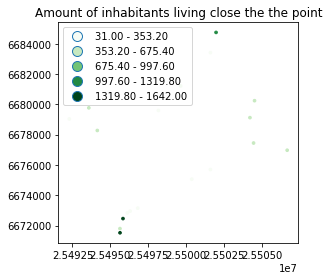

In [98]:
join.plot(column='pop15', cmap="Greens", markersize=7, scheme='equal_interval', legend=True)
plt.title("Amount of inhabitants living close the the point")
plt.tight_layout()